# Creating ReLU Activation Function

In [33]:
class Activation_ReLU:
    def forward(self, inputs):
        self.output = np.maximum(0, inputs)

In [34]:
#Create Spiral Data Set
import numpy as np

def spiral_data(points, classes):
    X = np.zeros((points*classes, 2))
    y = np.zeros(points*classes, dtype='uint8')
    for class_number in range(classes):
        ix = range(points*class_number, points*(class_number+1))
        r = np.linspace(0.0, 1, points)  # radius
        t = np.linspace(class_number*4, (class_number+1)*4, points) + np.random.randn(points)*0.2
        X[ix] = np.c_[r*np.sin(t*2.5), r*np.cos(t*2.5)]
        y[ix] = class_number
    return X, y


X, y = spiral_data(100, 3)

In [36]:
#Layer Class

class Layer_Dense:
    def __init__(self, n_inputs, n_neurons):
        self.weights = 0.10 * np.random.randn(n_inputs, n_neurons) #multiply by 0.10 so limit the range of weights from -0.1 to 0.1
        self.biases = np.zeros((1, n_neurons))
    def forward(self, inputs):
        self.output = np.dot(inputs, self.weights) + self.biases
        
        
layer1 = Layer_Dense(2,5)
activation1 = Activation_ReLU()

layer1.forward(X)
activation1.forward(layer1.output)

print(activation1.output)

[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 8.17771067e-05 0.00000000e+00
  6.79040636e-04]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 ...
 [4.16386469e-02 7.85309198e-03 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [4.20696893e-02 1.59631409e-01 0.00000000e+00 1.07548831e-02
  0.00000000e+00]
 [3.40563763e-02 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]]


# Softmax Activation Function

In [40]:
import math

#first need to exponentiate the negative and positive values, so that all values are postitive, but there is no meaning lost
#in the numbers. This cannot be done by just squaring the values, or using an absolute value

E = math.e

layer_outputs = [4.8, 1.21, 2.385]
exp_values = []

for output in layer_outputs:
    exp_values.append(E**output)

print(exp_values)


#Then we need to normalize the distriubution of the points, this is done after exponentiation

norm_base = sum(exp_values)
norm_values = []

for value in exp_values:
    norm_values.append(value/norm_base)

print(norm_values)
print(sum(norm_values))

[121.51041751873483, 3.353484652549023, 10.859062664920513]
[0.8952826639572619, 0.024708306782099374, 0.0800090292606387]
0.9999999999999999


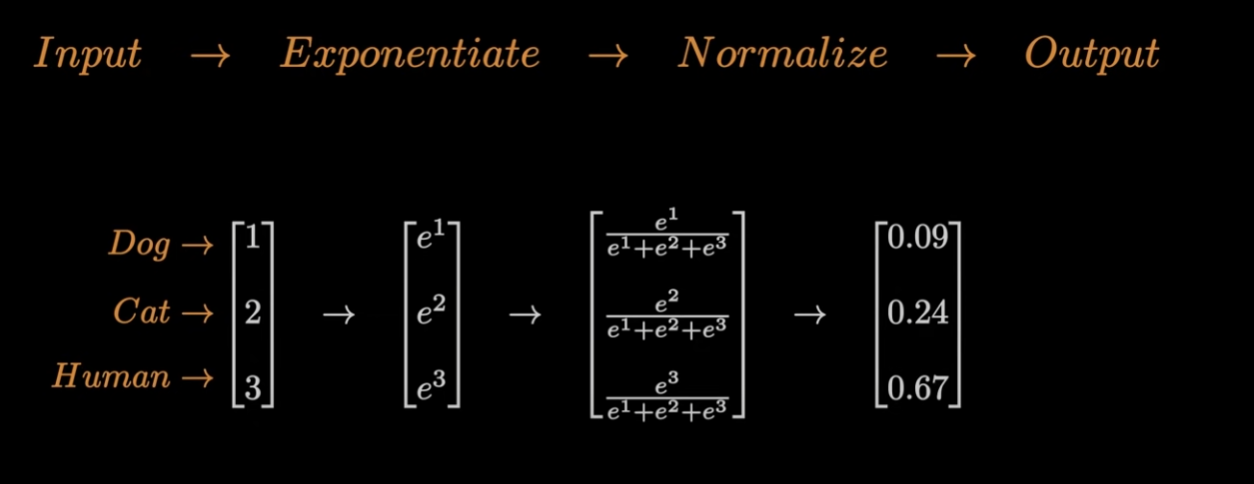

In [44]:
import numpy as np

layer_outputs = [[4.8, 1.21, 2.385],
                 [8.9, -1.81, 0.2],
                 [1.41, 1.051, 0.026]]

exp_values = np.exp(layer_outputs)
norm_values = exp_values / np.sum(exp_values, axis=1, keepdims=True)
print(norm_values)

[[8.95282664e-01 2.47083068e-02 8.00090293e-02]
 [9.99811129e-01 2.23163963e-05 1.66554348e-04]
 [5.13097164e-01 3.58333899e-01 1.28568936e-01]]


In [52]:
class Activation_Softmax:
    def forward(self, inputs):
        exp_values = np.exp(inputs - np.max(inputs, axis=1, keepdims=True))
        probs = exp_values / np.sum(exp_values, axis=1, keepdims=True)
        self.output = probs

In [54]:
X, y = spiral_data(100, 3)

#create layers
dense1 = Layer_Dense(2, 3)
activation1 = Activation_ReLU()

dense2 = Layer_Dense(3, 3)
activation2 = Activation_Softmax()

dense1.forward(X)
activation1.forward(dense1.output)

dense2.forward(activation1.output)
activation2.forward(dense2.output)

print(activation2.output)

[[0.33333333 0.33333333 0.33333333]
 [0.33332947 0.33329243 0.3333781 ]
 [0.33332553 0.3332777  0.33339677]
 [0.33332352 0.33322955 0.33344693]
 [0.33331786 0.33316974 0.3335124 ]
 [0.33331427 0.33313187 0.33355386]
 [0.33331167 0.33310452 0.33358381]
 [0.33330691 0.3330543  0.33363879]
 [0.33330497 0.33303396 0.33366107]
 [0.33341777 0.3334734  0.33310882]
 [0.33329372 0.33291574 0.33379054]
 [0.33328987 0.33287542 0.33383471]
 [0.33338491 0.3333728  0.33324229]
 [0.33328328 0.33280643 0.33391029]
 [0.33336698 0.33331603 0.33331699]
 [0.33355922 0.33377407 0.33266672]
 [0.33373776 0.33396473 0.33229751]
 [0.33345792 0.33351326 0.33302883]
 [0.33366581 0.33393076 0.33240343]
 [0.33349478 0.33358826 0.33291696]
 [0.33354541 0.33370443 0.33275016]
 [0.33392857 0.33415573 0.3319157 ]
 [0.33362544 0.33388633 0.33248823]
 [0.33335017 0.33321364 0.33343619]
 [0.33400117 0.33430059 0.33169824]
 [0.33397093 0.33432374 0.33170533]
 [0.33405374 0.3342712  0.33167506]
 [0.33405178 0.33441879 0.33

In [56]:
np.log(1+1e-7)

9.999999505838704e-08